### **TITANIC SURVIVOR ANALYSIS**

In [52]:
import numpy as np
import pandas as pd


## **READING DATA USING PANDAS**


We use pandas read_csv function to read the csv file in python and pandas DataFram method to convert file into the data frame. 

In [53]:
df=pd.DataFrame(pd.read_csv('/content/train (1).csv'))
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Using df.shape function we will get rows and coloumns of given dataframe.

In [54]:
df.shape

(891, 12)

Using df.size function we will get total size of dataframe.

In [55]:
df.size

10692

The type of given set is DataFrame.

In [106]:
type(df)

pandas.core.frame.DataFrame

**Description of the attribuites of the dataset**


Pclass:Passenger Class(1=1st;2=2nd;3=3rd)

survival:Survival(0=No;1=Yes)   

name:Name  
sex:Sex

age:Age

sibsp:Number of Siblings/Spouses Aboard

parch:Number of parents/Children Aboard

ticket:Ticket Number

fare:Passenger Fare(British pound)

cabin:Cabin

embarked:Port of Embarkation(C=Cherbourg;Q=Queenstown;S=Southampton)




#HANDELING NULL VALUES

The dataset may contains many rows and columns for which some values are missing,we can't leave those missing values as it is.
In such cases we have two option:

1.Either drop the entire row or column

2.Fill the missing values with some appropriate values let's say mean of all values for that column may do the job. 

In [56]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In above code snippets 'FALSE' values show that there is no null value and 'TRUE' that there is null value.

In this code we find out that there is more number of null values in Age,Cabin compare to other.

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Seprating out the columns which have more than 35% of the values missing in the dataset**

In [58]:
drop_col=df.isnull().sum()[df.isnull().sum()>(35/100*df.shape[0])]
drop_col

Cabin    687
dtype: int64

**NOTE**:There is no  specific number after which you should drop the column.It's just that we decided that on our own according to what we want.here,we findout that coloumn with null values doesn't going to help in our analysis so we can droped it. 

In [59]:
drop_col.index

Index(['Cabin'], dtype='object')

By using drop function, we will drop the cabin column which having more than 35% null values in dataframe.

In [60]:
df.drop(drop_col.index,axis=1,inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

By using fillna ,we will fill the null values with the mean of that numbers in rows. 

In [61]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In below snippet, we use describe function which will show the description/properties of particular block.

In [62]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

For Embarked attribuites ,we fill the NULL values with the most frequent values in column.

In [63]:
df['Embarked'].fillna('S',inplace=True)

In [45]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now all the NULL values have been filled .

By using mode fuction, we can get the average age shift and find out which age group is traveling. 

In [81]:
df['Age'].mode()

0    29.699118
dtype: float64

Accesssing the element of second row and fifth coloumn of dataframe.

In [102]:
df.iloc[2,5]

26.0

In [82]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,FamilySize,alone
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,0.012658,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,0.257307,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,-0.549500,0.065997,0.135207
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.182333,0.200988,-0.303646
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,0.091566,-0.248512,0.179775
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,1.000000,0.217138,-0.271832
FamilySize,-0.040143,0.016639,0.065997,0.200988,-0.248512,0.217138,1.000000,-0.690922
alone,0.057462,-0.203367,0.135207,-0.303646,0.179775,-0.271832,-0.690922,1.000000


**sibSp:**Number of Siblings/Spouse Aboard

**parch:**Number of parents/children Aboard

So we can make new column family_size by combining these two coloumns

In [65]:
df['FamilySize']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df.corr()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize
PassengerId,1.000000,-0.005007,-0.035144,0.033207,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.069809,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.331339,-0.549500,0.065997
Age,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512
Fare,0.012658,0.257307,-0.549500,0.091566,1.000000,0.217138
FamilySize,-0.040143,0.016639,0.065997,-0.248512,0.217138,1.000000


**FamilySize in the ship does not have much correlance with survival rate** 

Let's check if we weather the person was alone or not can effect the survival rate.

In [66]:
df['alone']=[0 if df['FamilySize'][i]>0 else 1 for i in df.index]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,FamilySize,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,1


In [71]:
df.groupby(['alone'])['Survived'].mean()

alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

If the person is alone he/she has less chance of surviving.


> The reason might be the person wgo is traveling with his family might be belonging to rich class and might be prioritised over other.



In [72]:
df[['alone','Fare']].corr()

,alone,Fare
alone,1.000000,-0.271832
Fare,-0.271832,1.000000


So we can se  if the person was not alone,the chance the ticket price is higher is high. 

In [74]:
df['Sex']=[0 if df['Sex'][i]=='male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

It shows ,female passenger have more chance of surviving than male ones.

It shows women were prioritized over men.

In [75]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

# **DATA VISUALIZATION**

In [108]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

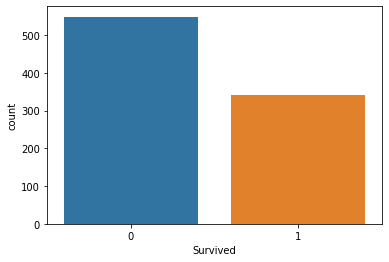

In [112]:
sb.countplot(data=df,x='Survived')

By using BarChart ,it shows that there is less number of people/passenger is survived compared to die. 

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

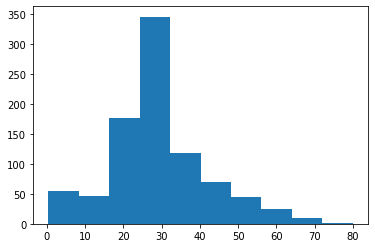

In [113]:
plt.hist(data=df,x='Age')

By Histogram ,we found that there is more people on board age group of (23-30). 

## **CONCLUSION**


*   Female passengers were prioritized over men.

*   People with high class or rich people have higher survival rate than other.The hierachichy might have been followed while saving the passengers.

*   Passengers travelling with their family have higher survival rate.
*   Passenger who boarded the ship at Cherbourg,srvived more in proportion then the others.
*   By the help of Analytical Visualisation we can predict with more precision and easy to understand.






